In [1]:
import cv2
from matplotlib import pyplot as plt

(686, 1200, 3)

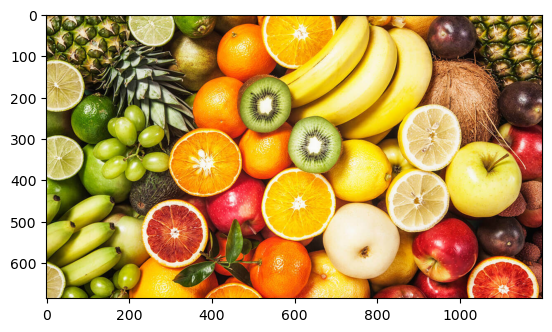

In [9]:
img=cv2.imread(r"C:\Users\71591\Desktop\dataset\fruits_detailfeature.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
img.shape

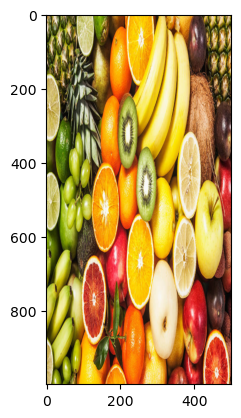

In [10]:
resized_img = cv2.resize(img, (500, 1000), interpolation=cv2.INTER_LINEAR)
plt.imshow(resized_img)

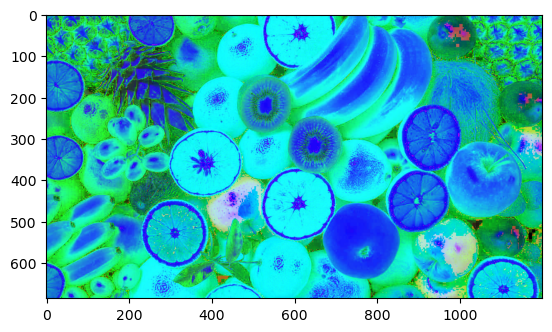

In [15]:
HSV_img=cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(HSV_img)

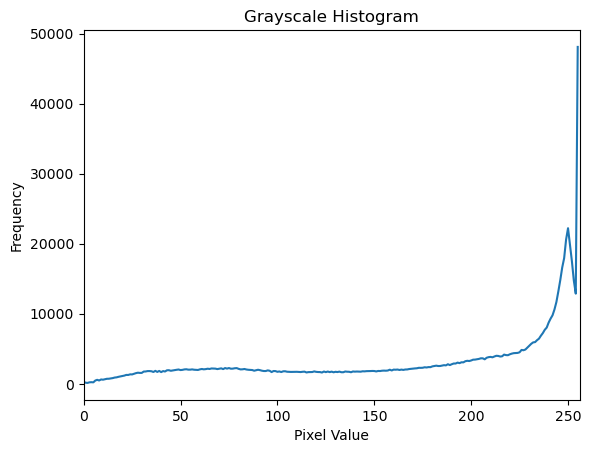

In [19]:
#histogram
hist = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()

In [16]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


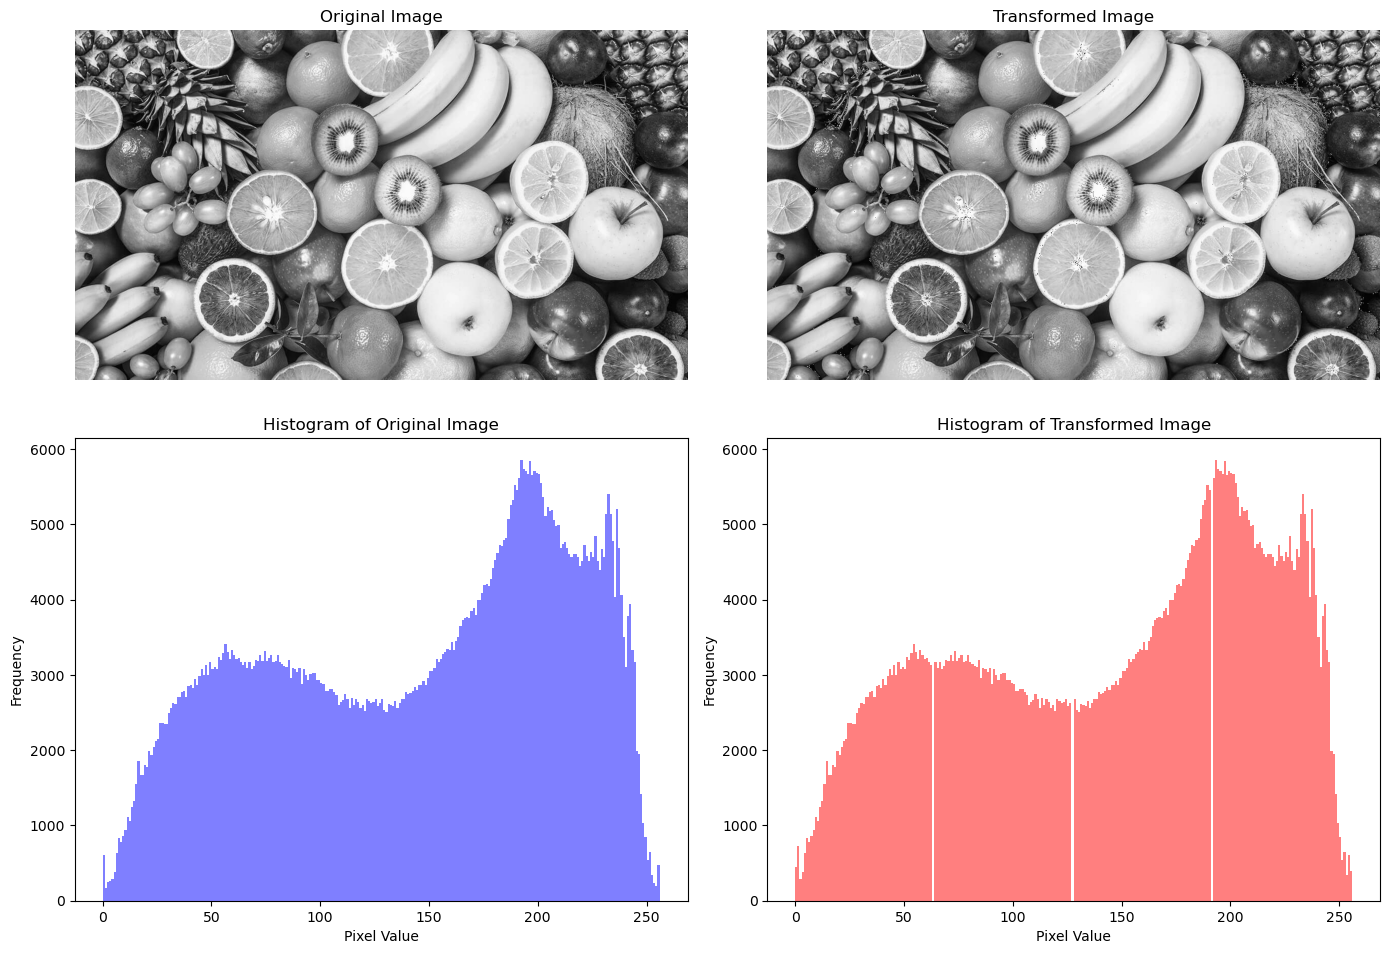

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the image
image = cv2.imread(r"C:\Users\71591\Desktop\dataset\fruits_detailfeature.jpg", cv2.IMREAD_GRAYSCALE)

# Calculate percentiles
percentile_low = 0.1  # Lower percentile
percentile_high = 99.9  # Higher percentile

# Find the minimum and maximum pixel values
min_val = np.percentile(image, percentile_low)
max_val = np.percentile(image, percentile_high)

# Apply the linear transformation
transformed_image = 255 * (image - min_val) / (max_val - min_val)

# Convert the transformed image to an unsigned 8-bit type
transformed_image = transformed_image.astype(np.uint8)

# Display the original and transformed images along with histograms
plt.figure(figsize=(14, 10))

# Plot the original image
plt.subplot(2, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.axis('off')

# Plot the transformed image
plt.subplot(2, 2, 2)
plt.title('Transformed Image')
plt.imshow(transformed_image, cmap='gray')
plt.axis('off')

# Plot the histogram of the original image
plt.subplot(2, 2, 3)
plt.hist(image.flatten(), bins=256, range=[0, 256], color='blue', alpha=0.5)
plt.title('Histogram of Original Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

# Plot the histogram of the transformed image
plt.subplot(2, 2, 4)
plt.hist(transformed_image.flatten(), bins=256, range=[0, 256], color='red', alpha=0.5)
plt.title('Histogram of Transformed Image')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


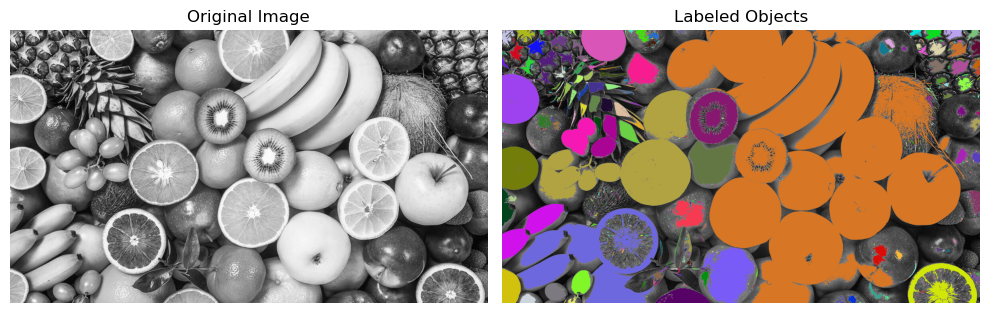

Number of objects in the image: 1604


In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
image = cv2.imread(r"C:\Users\71591\Desktop\dataset\fruits_detailfeature.jpg", cv2.IMREAD_GRAYSCALE)

# Apply global thresholding
threshold_value = 127
max_value = 255
_, binary_image = cv2.threshold(image, threshold_value, max_value, cv2.THRESH_BINARY)

# Perform connected component analysis (CCA)
num_labels, labels = cv2.connectedComponents(binary_image)

# Number of objects is num_labels - 1 (excluding the background)
num_objects = num_labels - 1

# Draw labels on the original image
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to color image for drawing
for label in range(1, num_labels):  # Start from 1 to skip background label
    mask = labels == label
    output_image[mask] = np.random.randint(0, 255, size=3)  # Random color for each object

# Display the result using Matplotlib in Jupyter Notebook
plt.figure(figsize=(10, 5))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.title('Original Image')
plt.axis('off')

# Display labeled image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Labeled Objects')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f'Number of objects in the image: {num_objects}')


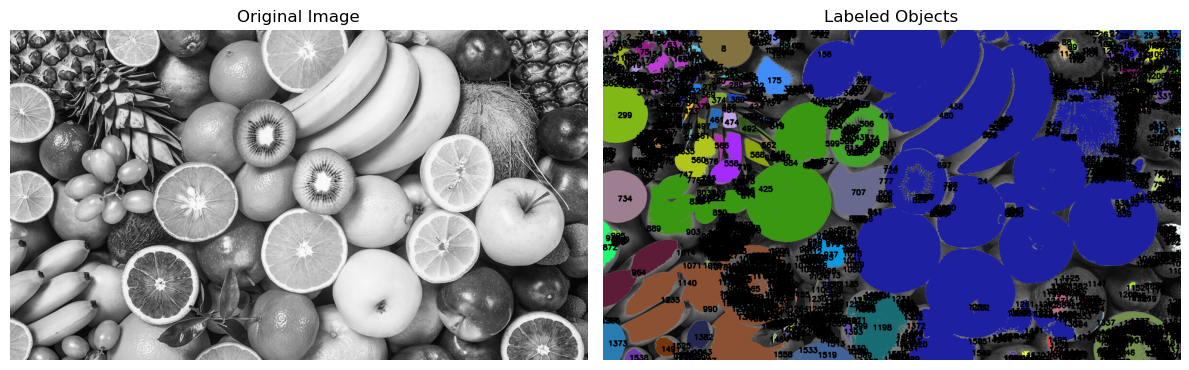

Number of objects in the image: 1604


In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the grayscale image
image = cv2.imread(r"C:\Users\71591\Desktop\dataset\fruits_detailfeature.jpg", cv2.IMREAD_GRAYSCALE)

# Apply global thresholding
threshold_value = 127
max_value = 255
_, binary_image = cv2.threshold(image, threshold_value, max_value, cv2.THRESH_BINARY)

# Perform connected component analysis (CCA)
num_labels, labels = cv2.connectedComponents(binary_image)

# Number of objects is num_labels - 1 (excluding the background)
num_objects = num_labels - 1

# Create a color map for labeling
label_colors = np.random.randint(0, 255, size=(num_labels, 3))  # Random colors for each label

# Draw labels on the original image
output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  # Convert to color image for drawing
for label in range(1, num_labels):  # Start from 1 to skip background label
    mask = labels == label
    output_image[mask] = label_colors[label]

# Add numbers to the labeled objects
for label in range(1, num_labels):  # Start from 1 to skip background label
    mask = (labels == label).astype(np.uint8)  # Convert boolean mask to uint8
    moments = cv2.moments(mask)
    if moments["m00"] != 0:  # Calculate centroid and add text
        cx = int(moments["m10"] / moments["m00"])
        cy = int(moments["m01"] / moments["m00"])
        cv2.putText(output_image, str(label), (cx - 10, cy + 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 2)

# Display the result using Matplotlib in Jupyter Notebook
plt.figure(figsize=(12, 6))

# Display original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_GRAY2RGB))
plt.title('Original Image')
plt.axis('off')

# Display labeled image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Labeled Objects')
plt.axis('off')

plt.tight_layout()
plt.show()

print(f'Number of objects in the image: {num_objects}')


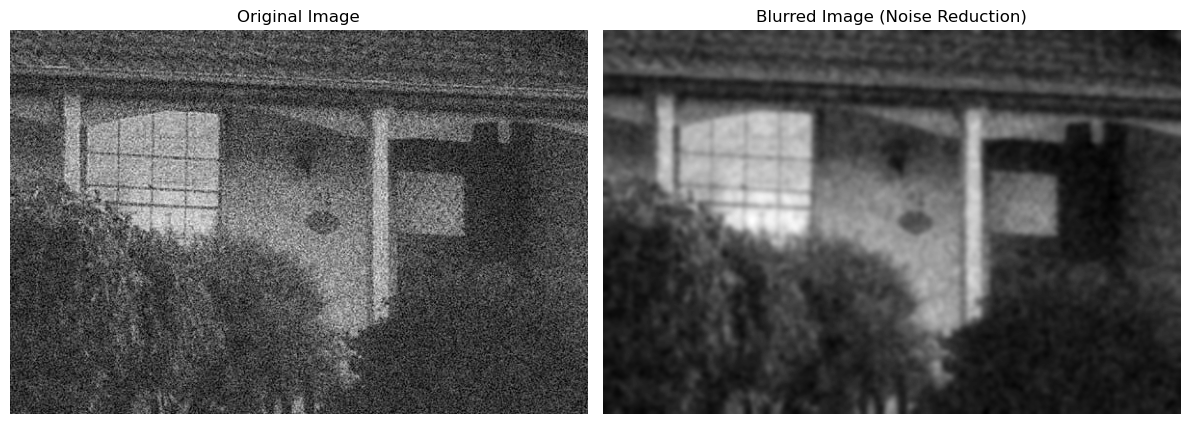

In [34]:
#noise cancelation 
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\71591\Desktop\dataset\noise.jpg"
image = cv2.imread(image_path)

# Convert to grayscale if needed
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur (adjust kernel size as needed)
blurred_image = cv2.GaussianBlur(gray_image, (15,15), 0)

# Display original and blurred images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image (Noise Reduction)')
plt.axis('off')

plt.tight_layout()
plt.show()


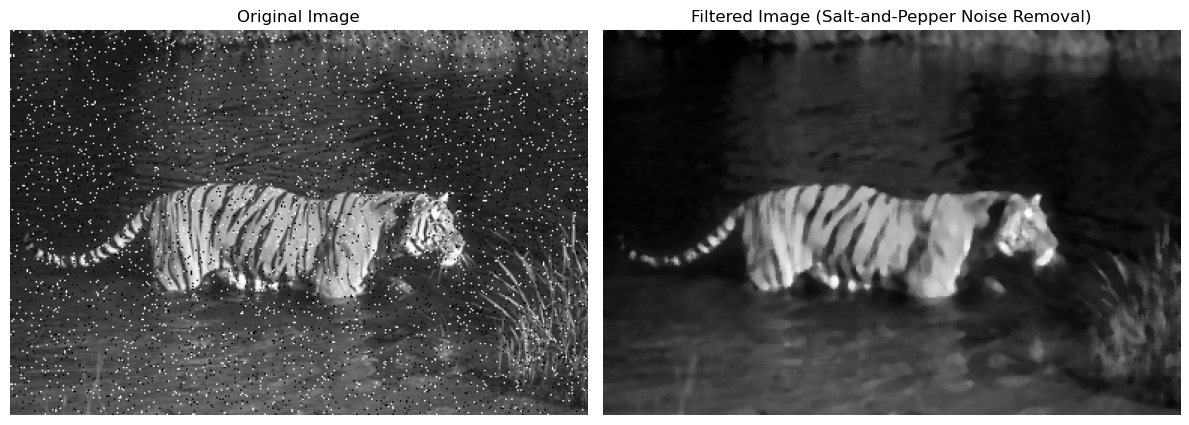

In [35]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\71591\Desktop\dataset\salt-and-pepper-noise.png"
image = cv2.imread(image_path)

# Convert to grayscale if needed
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply median blur to remove salt-and-pepper noise
filtered_image = cv2.medianBlur(gray_image, 5)  # Adjust kernel size as needed

# Display original and filtered images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(gray_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image (Salt-and-Pepper Noise Removal)')
plt.axis('off')

plt.tight_layout()
plt.show()


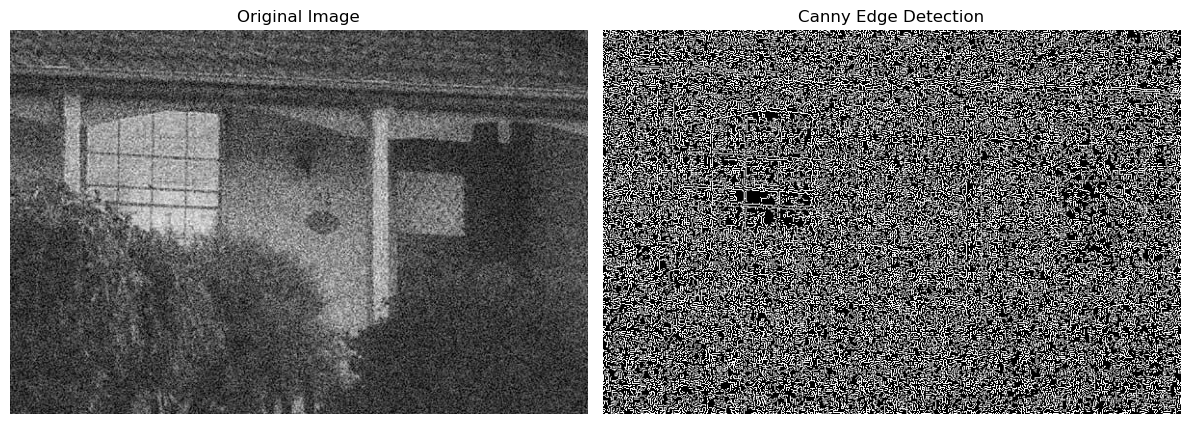

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = r"C:\Users\71591\Desktop\dataset\noise.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale

# Apply Canny edge detection
edges = cv2.Canny(image, threshold1=100, threshold2=200)  # Adjust thresholds as needed

# Display original and edge-detected images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.tight_layout()
plt.show()
